Misc Plotting utilities
===============


**Suhas Somnath**

8/12/2017  

**This is a short walk-through of useful plotting utilities available in sidpy**

Introduction
--------------
Some of the functions in ``sidpy.viz.plot_utils`` fill gaps in the default matplotlib package, some were
developed for scientific applications, These functions have been developed
to substantially simplify the generation of high quality figures for journal publications.

#### Import necessary packages:

In [1]:
# Ensure python 3 compatibility:
from __future__ import division, print_function, absolute_import, \
    unicode_literals
import numpy as np
from warnings import warn
import matplotlib.pyplot as plt
import subprocess
import sys
import sidpy

def install(package):
    subprocess.call([sys.executable, "-m", "pip", "install", package])


# Package for downloading online files:
try:
    import sidpy
except ImportError:
    warn('sidpy not found.  Will install with pip.')
    import pip

    install('sidpy')
    import sidpy

# General Utilities
# ==================
## set_tick_font_size()
# ---------------------
Adjusting the font sizes of the tick marks is often necessary for preparing figures for journal papers.
However, adjusting the tick sizes is actually tedious in python and this function makes this easier.

Subfigures	Fewer Rows	Fewer Columns
1		(1, 1)		(1, 1)
2		(1, 2)		(2, 1)
3		(1, 3)		(3, 1)
4		(2, 2)		(2, 2)
5		(2, 3)		(3, 2)
6		(2, 3)		(3, 2)
7		(2, 4)		(4, 2)
8		(2, 4)		(4, 2)
9		(3, 3)		(3, 3)
10		(3, 4)		(4, 3)
11		(3, 4)		(4, 3)
12		(3, 4)		(4, 3)
13		(3, 5)		(5, 3)
14		(3, 5)		(5, 3)
15		(3, 5)		(5, 3)
16		(4, 4)		(4, 4)


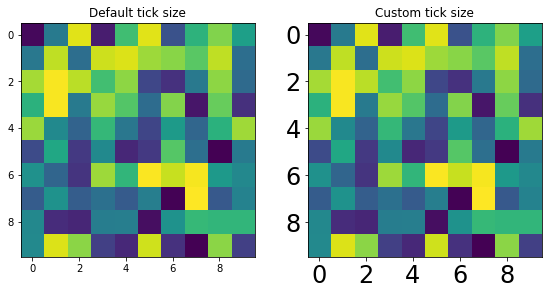

In [2]:
test = np.random.rand(10, 10)

fig, axes = plt.subplots(ncols=2, figsize=(8, 4))
for axis, title in zip(axes, ['Default', 'Custom']):
    axis.imshow(test)
    axis.set_title(title + ' tick size')
# only changing the tick font size on the second plot:
sidpy.viz.plot_utils.set_tick_font_size(axes[1], 24)
fig.tight_layout()


## get_plot_grid_size()
# ---------------------

This handy function figures out the layout for a 2D grid of sub-plots given a desired number of plots

In [9]:
print('Subfigures\tFewer Rows\tFewer Columns')
for num_plots in range(1, 17):
    print('{}\t\t{}\t\t{}'.format(num_plots,
                              sidpy.viz.plot_utils.get_plot_grid_size(num_plots, fewer_rows=True),
                              sidpy.viz.plot_utils.get_plot_grid_size(num_plots, fewer_rows=False)))

Subfigures	Fewer Rows	Fewer Columns
1		(1, 1)		(1, 1)
2		(1, 2)		(2, 1)
3		(1, 3)		(3, 1)
4		(2, 2)		(2, 2)
5		(2, 3)		(3, 2)
6		(2, 3)		(3, 2)
7		(2, 4)		(4, 2)
8		(2, 4)		(4, 2)
9		(3, 3)		(3, 3)
10		(3, 4)		(4, 3)
11		(3, 4)		(4, 3)
12		(3, 4)		(4, 3)
13		(3, 5)		(5, 3)
14		(3, 5)		(5, 3)
15		(3, 5)		(5, 3)
16		(4, 4)		(4, 4)


## make_scalar_mappable()
# ---------------------

This is a low-level function that is used by ``cbar_for_line_plot()`` to generate the color bar manually.
Here we revisit the example for plot_line_family() but we generate the colorbar by hand using
``make_scalar_mappable()``. In this case, we make the colorbar horizontal just as an example.

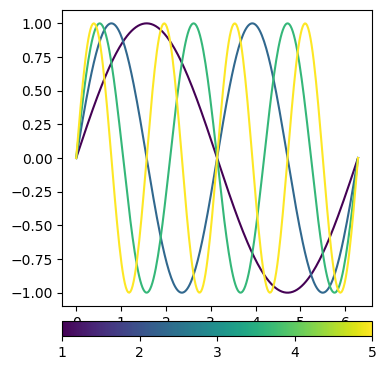

In [10]:
x_vec = np.linspace(0, 2*np.pi, 256)
freqs = range(1, 5)
y_mat = np.array([np.sin(freq * x_vec) for freq in freqs])

fig, axis = plt.subplots(figsize=(4, 4.75))
sidpy.viz.plot_utils.plot_line_family(axis, x_vec, y_mat)

num_steps = len(freqs)

sm = sidpy.viz.plot_utils.make_scalar_mappable(1, num_steps+1)

cbar = plt.colorbar(sm, ax=axis, orientation='horizontal',
                    pad=0.04, use_gridspec=True)



## cbar_for_line_plot()
# ---------------------
Note that from the above plot it may not be clear if the signal is radiating outwards or spiraling inwards.
In these cases it helps to add a colorbar. However, colorbars can typically only be added for 2D images.
In such cases we can use a handy function: ``cbar_for_line_plot()``

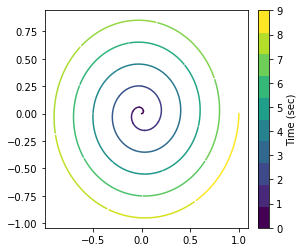

In [4]:
num_pts = 1024
t_vec = np.linspace(0, 10*np.pi, num_pts)

fig, axis = plt.subplots(figsize=(4.5, 4))
sidpy.viz.plot_utils.rainbow_plot(axis, np.cos(t_vec)*np.linspace(0, 1, num_pts),
                           np.sin(t_vec)*np.linspace(0, 1, num_pts),
                           num_steps=32)

cbar = sidpy.viz.plot_utils.cbar_for_line_plot(axis, 10)
cbar.set_label('Time (sec)')

## use_nice_plot_params()
# ----------------------
This function changes the default plotting parameters so that the figures look nicer and are closer to publication-
ready figures. Note that all subsequent plots will be generated using the new defaults.

## reset_plot_params()
# -------------------
This function resets the plot parameters to matplotlib defaults.
The following sequence of default >> nice >> default parameters will illustrate this.


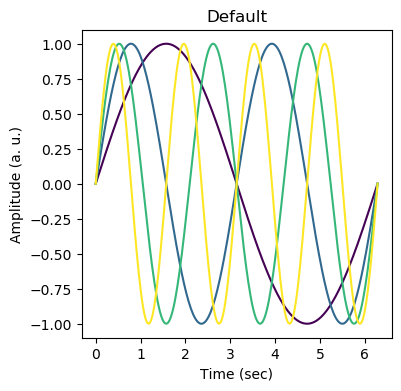

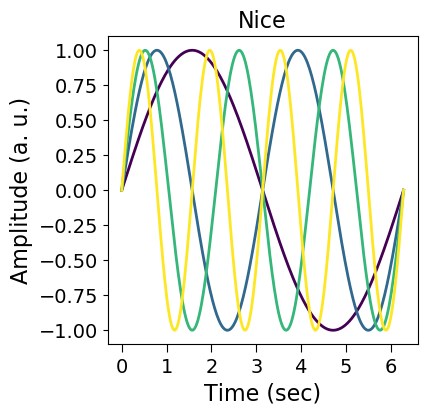

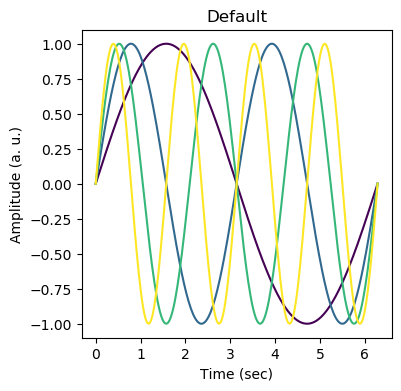

In [8]:
x_vec = np.linspace(0, 2*np.pi, 256)
freqs = range(1, 5)
y_mat = np.array([np.sin(freq * x_vec) for freq in freqs])

for nice in [False, True, False]:
    if nice:
        sidpy.viz.plot_utils.use_nice_plot_params()
    else:
        sidpy.viz.plot_utils.reset_plot_params()
    fig, axis = plt.subplots(figsize=(4, 4))
    sidpy.viz.plot_utils.plot_line_family(axis, x_vec, y_mat)
    axis.set_xlabel('Time (sec)')
    axis.set_ylabel('Amplitude (a. u.)')
    if nice:
        axis.set_title('Nice')
    else:
        axis.set_title('Default')